In [230]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split

from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [231]:
# fetch dataset 
iris = fetch_ucirepo(id=53) 
X = iris.data.features 
y = iris.data.targets 

In [232]:
y

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [233]:
# Change target feature from string to int

y = y.copy() # To make sure the changes are being done a new copy of the dataframe rather than doing chained assignments
y.loc[y['class'] == 'Iris-setosa', 'class'] = 0
y.loc[y['class'] == 'Iris-versicolor', 'class'] = 1
y.loc[y['class'] == 'Iris-virginica', 'class'] = 2
# Initially the column had words, meaning the dtype was object. Hence, why we need to explicitly convert the type to int
y['class'] = y['class'].astype(int)
y

,class
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [234]:
# Train test split

X = np.array(X[['sepal length', 'sepal width', 'petal length', 'petal width']])
y = np.array(y['class'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [235]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [236]:
# Create a Model class that inherits nn.Module

# why is pytorch code in class based object oriented programming

class Model(nn.Module):
    # Input layer (4 features of the flower) --> 
    # Hidden layer1 (number of neurons) --> 
    # output (3 classes of iris flowers)
    def __init__(self, in_features=4, h1=4, out_features=3):
        super().__init__() # instantiate the nn.module
        self.fc1 = nn.Linear(in_features, h1)
        self.out = nn.Linear(h1, out_features)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.out(x)
        
        return x

In [237]:
# Pick a manual seed for randomization
torch.manual_seed(41)
# Create an instance of model
model = Model()

In [238]:
# Convert y labels to tensors long (for 64 bit integers)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [239]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Using SGD for full-batch gradient descent with entire dataset at once and defining the Learning rate
optimizer = torch.optim.SGD(model.parameters(), lr=0.06)

In [240]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=4, bias=True)
  (out): Linear(in_features=4, out_features=3, bias=True)
)>

In [241]:
# Train our model

epochs = 100
losses = []
for i in range(epochs):
    # Forward pass
    y_pred = model.forward(X_train) # Get predicted results
    
    # Measure the loss
    loss = criterion(y_pred, y_train) 
    
    # Keep track of the losses
    losses.append(loss.detach().numpy()) # The loss output comes a tensor type. By using detach, it will be usable for plotting
    
    # Print every 10 epoch
    if i % 10 == 0:
        print(f'Epoch: {i} and loss: {loss}')
        
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 and loss: 1.1550945043563843
Epoch: 10 and loss: 0.9746381044387817
Epoch: 20 and loss: 0.8502460718154907
Epoch: 30 and loss: 0.711383044719696
Epoch: 40 and loss: 0.5942331552505493
Epoch: 50 and loss: 0.5116456151008606
Epoch: 60 and loss: 0.45558422803878784
Epoch: 70 and loss: 0.4147414565086365
Epoch: 80 and loss: 0.3819625675678253
Epoch: 90 and loss: 0.35368186235427856


Text(0.5, 0, 'epoch')

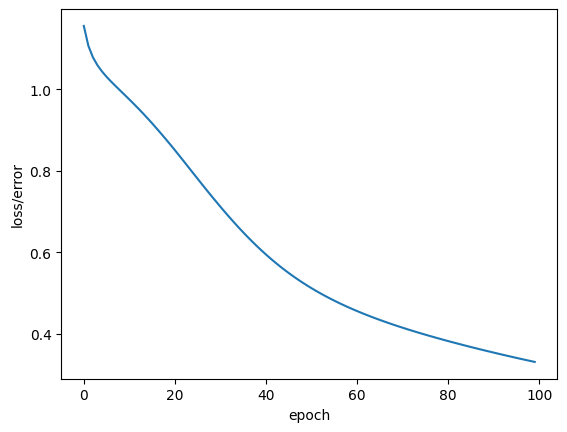

In [242]:
# Graph the results

plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("epoch")

In [6]:
'''
One interesting observation that can be made here is that, although the neural network architecture, and dataset are the same
as the hard coded version, PyTorch library's implementation is performing extra optimizations that are making it perform
better with lesser epochs and much smaller learning rate than the hard coded version.
'''

"\nOne interesting observation that can be made here is that, although the neural network architecture, dataset are the same\nas the hard coded version, PyTorch library's implementation is performing extra optimizations that are making it perform\nbetter with lesser epochs and much smaller learning rate than the hard coded version.\n"

In [243]:
# Evaluate the model on test data set (validate model on test set)
with torch.no_grad(): # Basically turn off back propogation
    y_eval = model.forward(X_test) 
    loss = criterion(y_eval, y_test)

In [244]:
loss

tensor(0.3423)

In [245]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)
        
        # Will tell us what type of flower the network thinks it is
        print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')
        
        # Correct or not 
        if y_val.argmax().item() == y_test[i]:
            correct += 1

print(f'We got {correct} correct!')

1.) tensor([-2.1377,  1.0790,  1.0134]) 	 1 	 1
2.) tensor([ 4.0611,  1.0075, -3.9980]) 	 0 	 0
3.) tensor([-5.1748,  1.4172,  3.2884]) 	 2 	 2
4.) tensor([-1.9061,  1.1005,  0.8118]) 	 1 	 1
5.) tensor([-1.9209,  1.1917,  0.7696]) 	 1 	 1
6.) tensor([ 3.8447,  0.9618, -3.7944]) 	 0 	 0
7.) tensor([-0.5084,  1.0355, -0.2891]) 	 1 	 1
8.) tensor([-2.5363,  1.3019,  1.2058]) 	 2 	 1
9.) tensor([-2.3265,  1.0982,  1.1560]) 	 1 	 2
10.) tensor([-1.0148,  1.0417,  0.1201]) 	 1 	 1
11.) tensor([-2.5996,  1.2232,  1.3042]) 	 2 	 2
12.) tensor([ 3.4218,  0.8362, -3.3749]) 	 0 	 0
13.) tensor([ 4.4329,  0.9620, -4.2741]) 	 0 	 0
14.) tensor([ 3.3941,  0.8529, -3.3622]) 	 0 	 0
15.) tensor([ 4.0013,  0.9284, -3.9022]) 	 0 	 0
16.) tensor([-1.7775,  1.1655,  0.6683]) 	 1 	 1
17.) tensor([-4.0791,  1.2277,  2.5078]) 	 2 	 2
18.) tensor([-1.2675,  0.9968,  0.3529]) 	 1 	 1
19.) tensor([-2.1040,  1.0366,  1.0112]) 	 1 	 1
20.) tensor([-3.9549,  1.2077,  2.4185]) 	 2 	 2
21.) tensor([ 3.1165,  0.8389

In [246]:
# Trying custom data on the NN
new_iris = torch.tensor([5.7, 4.1, 2.0, 1.0])

with torch.no_grad():
    print(model(new_iris))

tensor([ 3.4648,  1.0848, -3.5579])


In [247]:
newer_iris = torch.tensor([5.9, 3.0, 5.1, 1.8])

with torch.no_grad():
    print(model(newer_iris))

tensor([-3.0830,  1.1147,  1.7630])


In [248]:
# Save the NN Model
torch.save(model.state_dict(), 'Iris_Pytorch.pt')

In [249]:
# Load the Model
new_model = Model()
new_model.load_state_dict(torch.load('Iris_Pytorch.pt', weights_only=True))


<All keys matched successfully>

In [250]:
# Make sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=4, bias=True)
  (out): Linear(in_features=4, out_features=3, bias=True)
)